<a href="https://colab.research.google.com/github/harrisb002/CS_479/blob/Labs/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Basic filtering
This lab introduces neighborhood operations that can achieve effects such as blurring, sharpening, edge detection, and assist in removing noise.

In [ ]:
import scipy.ndimage as ndi
import numpy as np
import skimage
from skimage import io
from skimage import data, img_as_float
import matplotlib.pyplot as plt
import os, math


Consider a `5 x 5` toy example data and a uniform filter (a filter is also known as spatial mask)

In [ ]:
x = (np.array([[17,24,1,8,15],[23,5,7,14,16],[4,6,13,20,22],[10,12,19,21,3],[11,18,25,2,9]])*10)
print(x.dtype, x, sep = "\n")
a = np.ones((3,3))/9
print(a.dtype, a, sep = "\n")

int64
[[170 240  10  80 150]
 [230  50  70 140 160]
 [ 40  60 130 200 220]
 [100 120 190 210  30]
 [110 180 250  20  90]]
float64
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


We can use the `convolve` function to filter image `x` with spatial mask `a`. Check out the documentation to see how this function deals with the border.

In [ ]:
?ndi.convolve

In [ ]:
?ndi.uniform_filter

In [ ]:
#The mode parameter, here set to ’constant’, tells the function that the image is to be padded with constant values,
#the default value of which is zero,
ndi.convolve(x,a,mode='constant')

array([[ 76,  85,  65,  67,  58],
       [ 87, 111, 108, 128, 105],
       [ 66, 109, 130, 150, 106],
       [ 67, 131, 151, 148,  85],
       [ 56, 105, 107,  87,  38]])

Change the `filterSize` to determine impact on amount of blurring. Note, two images are being displayed, which deal with the border using a different mode (what is the default mode?)

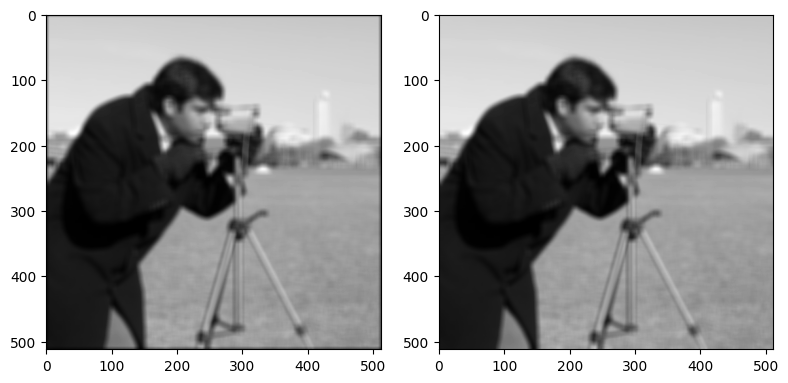

In [ ]:
img = data.camera()

#In-built function for uniform filtering
filterSize = 10
imgf = ndi.uniform_filter(img, filterSize, mode='constant')

#the default behavior of spatial convolution at the edges of the image is to reflect the image in all its edges.
imgf2 = ndi.uniform_filter(img, filterSize)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5)) #sharex = True, sharey = True
ax[0].imshow(imgf, cmap='gray')
ax[1].imshow(imgf2, cmap='gray')

# prevent overlap of y-axis labels
plt.tight_layout()

### Blurring effect

Linear filters work by convoluting an image with a smaller template. That small template can be anything, but commonly it is a well-defined small matrix. Above, we saw it was a uniform matrix with a single value.

It can also be a 2D Gaussian. We can have a look at its actual shape by filtering an image that has a single pixel ON:

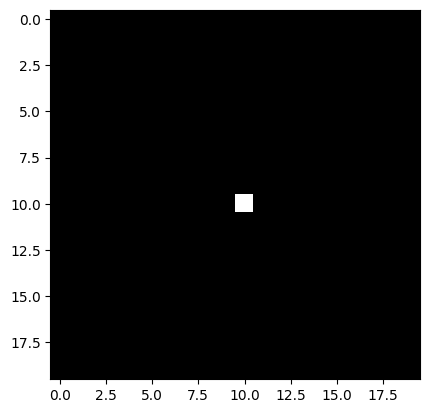

In [ ]:
single_dot = np.zeros((20,20))
single_dot[10,10] = 1
plt.imshow(single_dot, cmap = 'gray');

The Gaussian has default values and we can simply apply it on an image:

In [ ]:
?skimage.filters.gaussian

In [ ]:
filtered = skimage.filters.gaussian(single_dot) #extent of gaussian filter truncated by default at 4*sigma

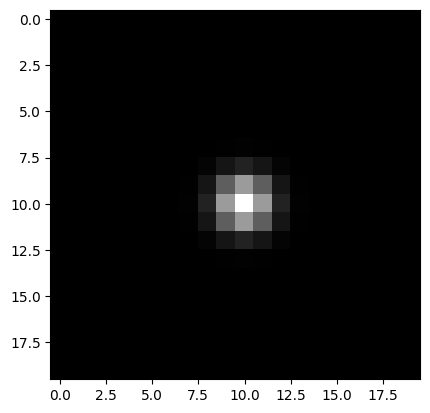

In [ ]:
plt.imshow(filtered, cmap = 'gray');

We can just plot a cross section to better understand what happened:

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 5.33908537e-05 1.76806225e-03
 2.15394077e-02 9.65329280e-02 1.59155892e-01 9.65329280e-02
 2.15394077e-02 1.76806225e-03 5.33908537e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]


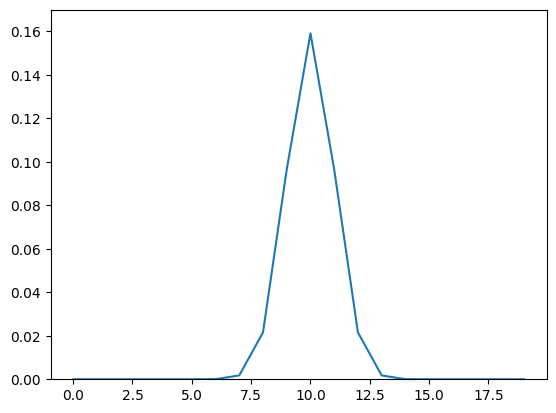

In [ ]:
plt.plot(filtered[10,:]);
plt.ylim([0,0.17])
print(filtered[10,:])

The effect of this filtering was to "widen" the original single pixel, which is now spread out across the image. We can now also specify the width of the gaussian:

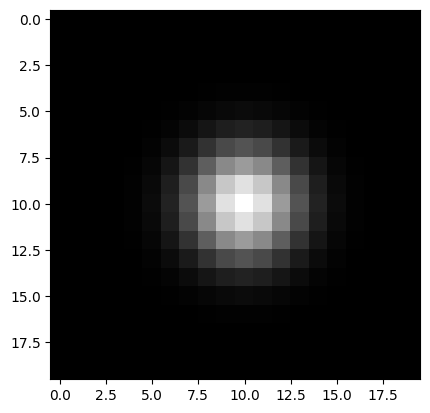

In [ ]:
filtered = skimage.filters.gaussian(single_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

Let us plot a cross section again:

Sum of all values in the filter =  1.0000000000000002


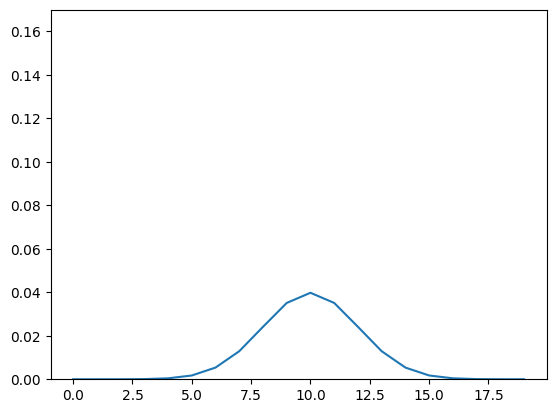

In [ ]:
#print("Values in the cross-section:", filtered[10,:])
plt.plot(filtered[10,:]);
plt.ylim([0,0.17])

print("Sum of all values in the filter = ", filtered.sum())

The Gaussian has become even wider. Let's put two dots on our image and see what happens:

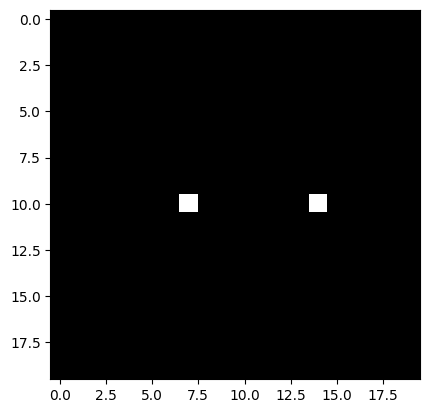

In [ ]:
double_dot = np.zeros((20,20))
double_dot[10,7] = 1
double_dot[10,14] = 1
plt.imshow(double_dot, cmap = 'gray');

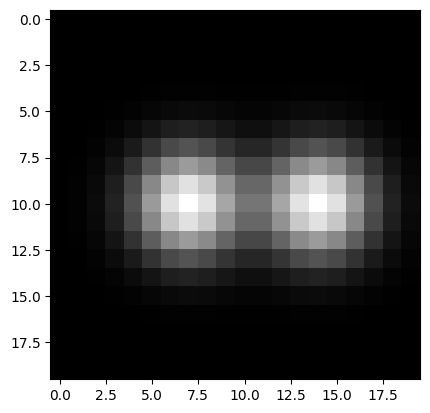

In [ ]:
filtered = skimage.filters.gaussian(double_dot,sigma=2)
plt.imshow(filtered, cmap = 'gray');

The end effect is to blur our image. If we apply our filter twice we get an even blurrier image:

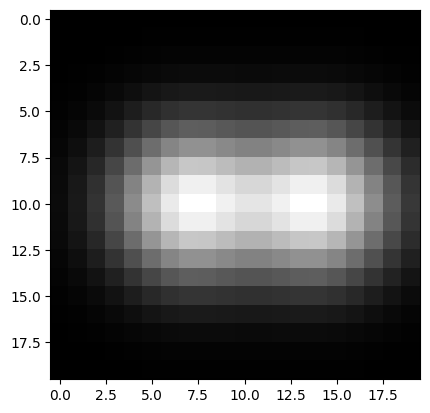

In [ ]:
filtered2 = skimage.filters.gaussian(filtered,sigma=2)
plt.imshow(filtered2, cmap = 'gray');

### Low pass filters
Both the uniform and Gaussian filters belong to what are known as "low pass filters". The terminology is related to understanding of images in a frequency domain. We won't discuss in much detail but the broad idea is that "low frequencies" correspond to slow changes in intensity in the image whereas "high frequencies" manifest as edges or any kind of abrupt changes in image intensity. So, a low-**pass** filter keeps the "low frequencies" in images and blocks the "high frequencies" in the image, essentially blurring the image.

Let us apply the Gaussian filter to an image.

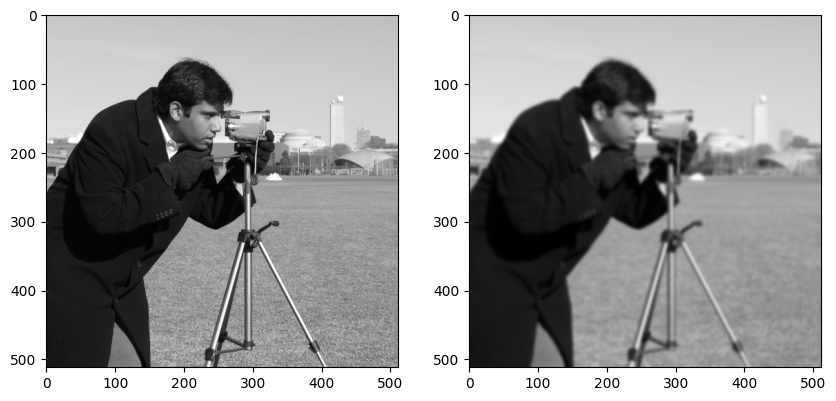

In [ ]:
img = data.camera()

filtered = skimage.filters.gaussian(img,sigma=2)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5)) #sharex = True, sharey = True
ax[0].imshow(img, cmap='gray')
ax[1].imshow(filtered, cmap='gray')

## Part A (10 points)

Write a function `blurWithGaussian` that takes in an input image and `sigma` as parameters. This function convolves (filters) the image with a Gaussian whose standard-deviation is `sigma`. In addition, it also convolves the image with the same Gaussian but whose width is truncated to only `1` standard deviation (Check the documentation of `skimage.filters.gaussian` function to figure this out). It plots the input image, and both filtered images. It returns the filtered images in a tuple.

Call the function with different `sigma` value. What do you observe? What's the difference between the two filtered images?

In [ ]:
def blurWithGaussian(img, sigma):
    # YOUR CODE HERE
    blur1 = skimage.filters.gaussian(img,sigma)
    blur2 = skimage.filters.gaussian(img,sigma, truncate=1)
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    ax[0].imshow(blur1, cmap='gray')
    ax[1].imshow(blur2, cmap='gray')
    return blur1, blur2


0.2768946593439518 0.2802993305625085
Success! All tests passed.


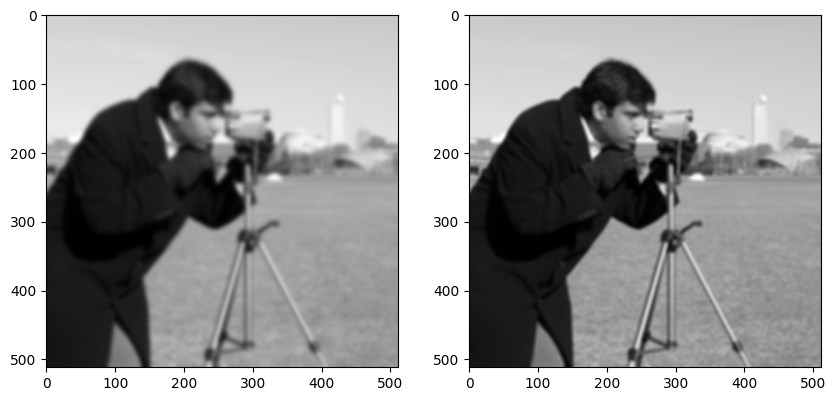

In [ ]:
img = data.camera()
blur1, blur2 = blurWithGaussian(img, 3)
print(blur1.std(), blur2.std())

assert(math.isclose(blur1.std(), 0.276894659344))
assert(math.isclose(blur2.std(), 0.28029933056))
print("Success! All tests passed.")

0.2057426619793909 0.21375438672611954
Success! All tests passed.


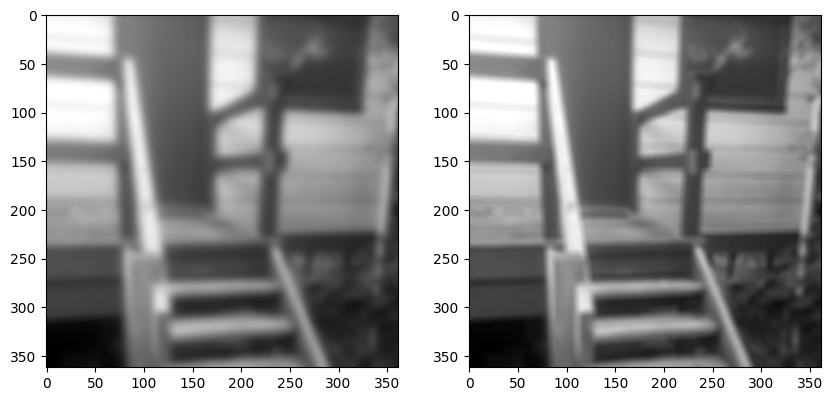

In [ ]:
filename = os.path.join( 'stairs.png')
img = io.imread(filename)
blur1, blur2 = blurWithGaussian(img, 4)
print(blur1.std(), blur2.std())

assert(math.isclose(blur1.std(), 0.205742661979))
assert(math.isclose(blur2.std(), 0.213754386726))
print("Success! All tests passed.")

## Edge Detection using High-pass filters
Similar to the low-pass filters, high-**pass** filters keep the "high frequencies" in images and block the "low frequencies" in the image, essentially finding edges in the image.

Let us begin with a toy example of a step-edge that is a single column of bright line in a dark background.

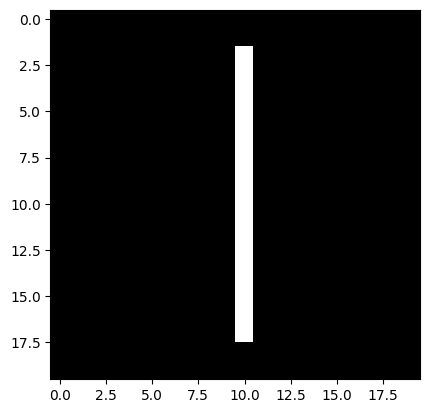

In [ ]:
single_line = np.zeros((20,20))
single_line[2:-2,10:11] = 1
plt.imshow(single_line, cmap = 'gray');

A cross-section to visualize the "step edge"

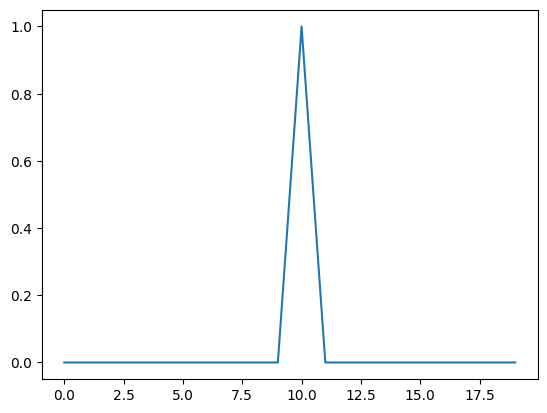

In [ ]:
plt.plot(single_line[10,:]);

### First-order difference operator
Apply a first-order difference operator `[1, 0, -1]` to this toy image.

Advanced note: to extend this to 2D, multiply a `3 x 1` averaging mask `[1, 1, 1]'` to the `1 x 3` first-order difference operator  `[1, 0, -1]` to get the`3 x 3` 2D first-order difference operator:
`[1, 1, 1]' * [1, 0, -1] =`

$$\begin{bmatrix} 1 & 0 & -1 \\ 1 & 0 & -1 \\ 1 & 0 & -1 \end{bmatrix}$$

[[ 1  0 -1]
 [ 1  0 -1]
 [ 1  0 -1]]


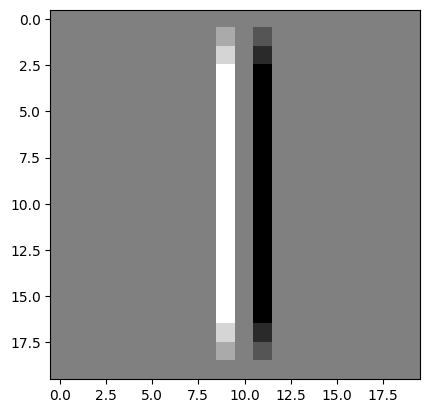

In [ ]:
f = np.array([[1,0,-1],[1,0,-1],[1,0,-1]]) #(first-order difference in x; smoothing in y)
print(f)
filtered = ndi.convolve(single_line,f)
plt.imshow(filtered, cmap = 'gray');

Let us plot a cross section to better understand what's happening:

Sum of all values in the filter =  0.0


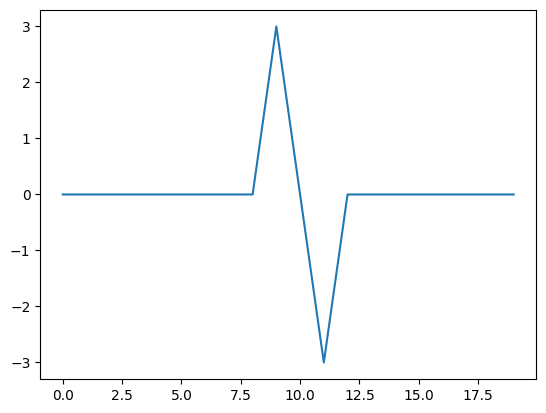

In [ ]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

## Part B (5 points)

Note how the first-order difference filter responds to each side of the edge.

What do you observe as the width of the step-edge is increased? For example, when you change width from 1 pixel (current) to 3-pixels to 5-pixels?
 - **Note 1**: the current width is 1 because in this code `single_line[2:-2,10:11] = 1`, the column slicing `10:11` implies the `10th` column. How will you change this so that after slicing it affects 3 columns? 5 columns?  
  - **Note 2**: You are not changing the filter `f`.

3.0
3.0
(20, 20)


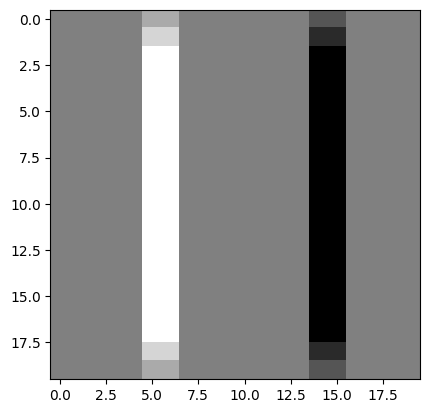

In [ ]:
# YOUR CODE HERE
single_line[1:-1,6:15] = 1
filtered = ndi.convolve(single_line,f)
plt.imshow(filtered, cmap = 'gray');

print(filtered[10,5])
print(filtered[10,6])

print(filtered.shape)

In [ ]:
#for these tests below, make the width of the edge to span 9 columns
#so nine pixel-wide around the 10th column
assert(filtered[10,5] == 3.0)
assert(filtered[10,6] == 3.0)
assert(filtered[10,14] == -3.0)
assert(filtered[10,15] == -3.0)

### Second-order difference operator
Now apply a second-order difference operator `[1, -2, 1]` to this toy image.

Advanced note: to extend this to 2D, multiply a `3 x 1` averaging mask `[1, 1, 1]'` to the `1 x 3` second-order difference operator  `[1, -2, 1]` to get the`3 x 3` 2D first-order difference operator:
`[1, 1, 1]' * [1, -2, 1] =`

$$\begin{bmatrix} 1 & -2 & 1 \\ 1 & -2 & 1 \\ 1 & -2 & 1 \end{bmatrix}$$

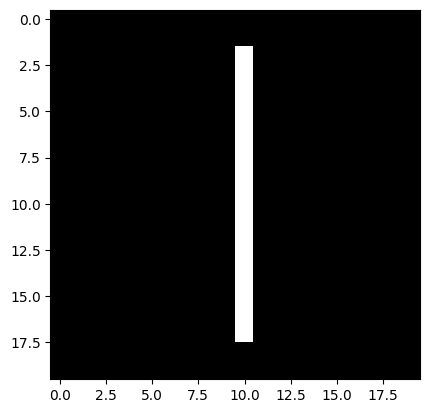

In [ ]:
#reset the image
single_line = np.zeros((20,20))
single_line[2:-2,10:11] = 1
plt.imshow(single_line, cmap = 'gray');

[[ 1 -2  1]
 [ 1 -2  1]
 [ 1 -2  1]]


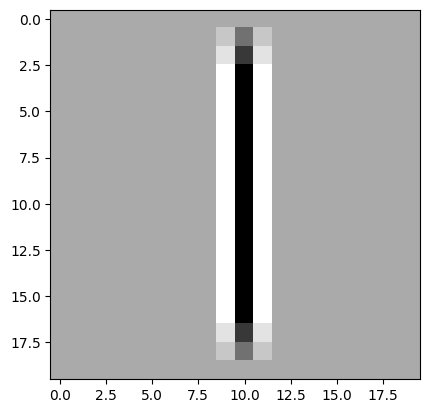

In [ ]:
f = np.array([[1,-2,1],[1,-2,1],[1,-2,1]]) #second-order difference operator in x (smoothing in y)
print(f)
filtered = ndi.convolve(single_line,f)
plt.imshow(filtered, cmap = 'gray');

Sum of all values in the filter =  0.0


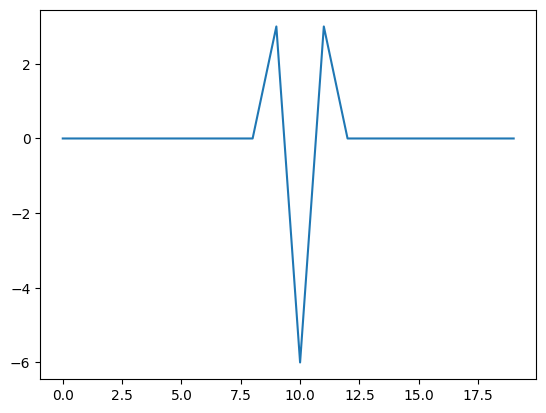

In [ ]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

## Part C (5 points)

Note how the second-order difference filter responds to each side of the edge.
 - How does it differ from the response in Part B?
 - What do you observe as the width of the edge is increased? For example from 1 pixel (current) to 5-pixels to 9-pixels?

(20, 20)


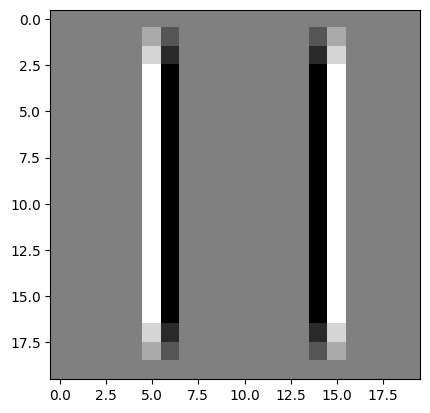

In [ ]:
# YOUR CODE HERE
single_line[2:-2,6:15] = 1
filtered = ndi.convolve(single_line,f)
plt.imshow(filtered, cmap = 'gray');
print(filtered.shape)


In [ ]:
#for these tests below, make the width of the edge to span 9 columns
#so nine pixel-wide around the 10th column

assert(filtered[10,5] == 3.0)
assert(filtered[10,6] == -3.0)
assert(filtered[10,14] == -3.0)
assert(filtered[10,15] == 3.0)

Let us repeat applying the first-order difference and second-order difference operators to a "**ramp edge**" (an edge that *slowly* ramps up from 0 to 1 as opposed to changing in a single step)

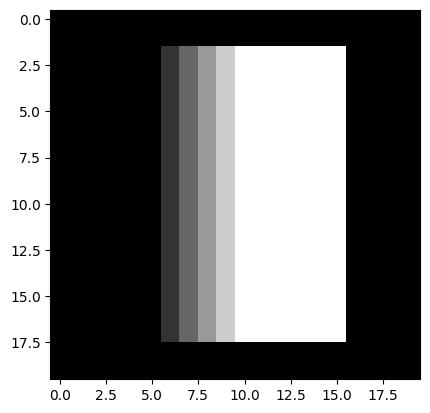

In [ ]:
ramp_edge = np.zeros((20,20)) #Start with all zeros
#ramp_edge[2:-2,3:12] = np.arange(0.1,1,0.1)
#ramp_edge[2:-2,12:16] = 1
ramp_edge[2:-2,6:10] = np.arange(0.2,1,0.2) #Four columns to have gradually increasing intensity values
ramp_edge[2:-2,10:16] = 1 #Six columns to have the max intensity value
plt.imshow(ramp_edge, cmap = 'gray');

A cross-section again to visualize the "ramp edge"

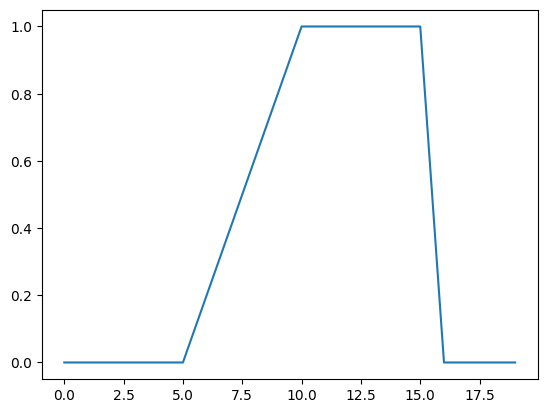

In [ ]:
plt.plot(ramp_edge[10,:]);

Apply first-order difference operator:

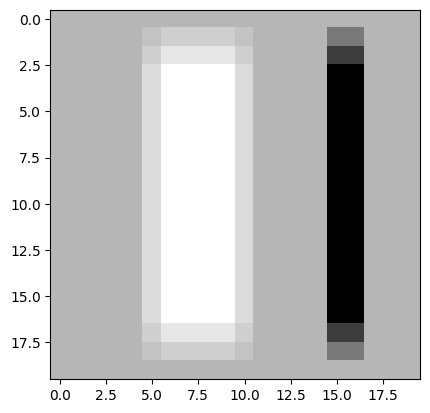

In [ ]:
f = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
filtered = ndi.convolve(ramp_edge,f)
plt.imshow(filtered, cmap = 'gray');

Sum of all values in the filter =  8.881784197001252e-16


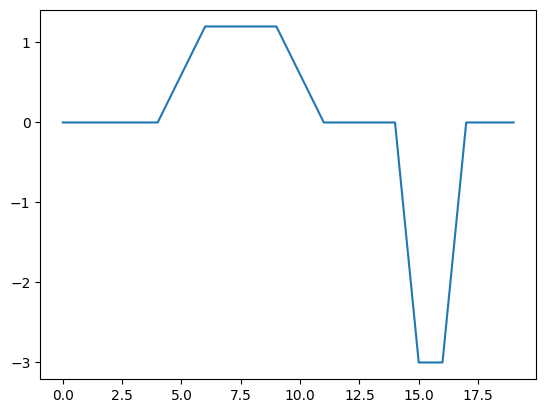

In [ ]:
plt.plot(filtered[10,:]);
print("Sum of all values in the filter = ", filtered.sum())

Apply second-order difference operator:

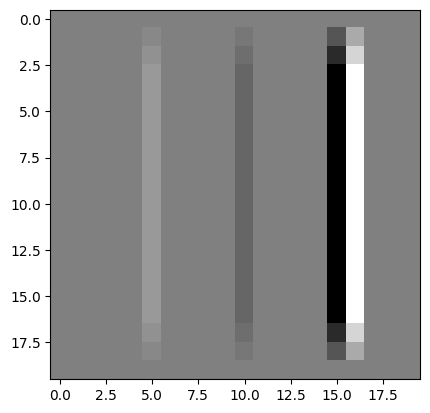

In [ ]:
f2 = np.array([[1,-2,1],[1,-2,1],[1,-2,1]])
filtered2 = ndi.convolve(ramp_edge,f2)
plt.imshow(filtered2, cmap = 'gray');

Sum of all values in the filter =  -8.881784197001252e-16


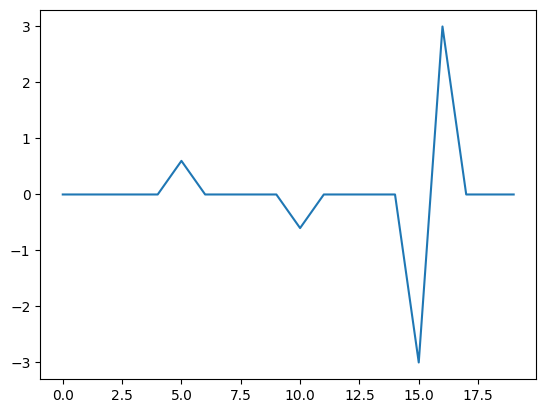

In [ ]:
plt.plot(filtered2[10,:]);
print("Sum of all values in the filter = ", filtered2.sum())

## Part D (5 Points)

Construct a ramp edge that not only slowly ramps-up but also slowly ramps-down. Specifically, four columns to have gradually increasing intensity values (**exactly** like before), next four colums with value 1, and the next four columns to gradually **decrease** intensity values (with the same interval as the ramp-up but decreasing).

Plot the responses of both first-order and second-order filters on this new ramp edge, along with their cross-section in a 2x2 plot. See the image below as the desired output.

![rampedge_response](rampedge_response.png)



Text(0.5, 1.0, '2nd-Order')

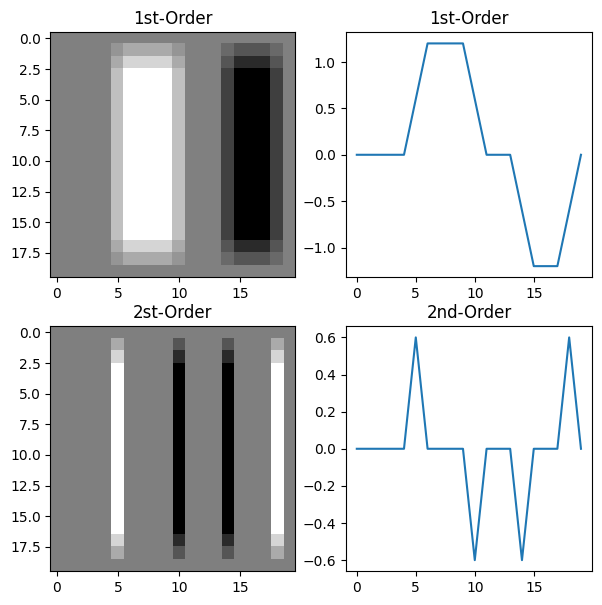

In [ ]:
# YOUR CODE HERE

ramp_edge = np.zeros((20,20)) #Start with all zeros
ramp_edge[2:-2,6:10] = np.arange(.2,1,.2) #4 columns to have gradually increasing intensity values
ramp_edge[2:-2,10:] = 1 #4 columns to have the max intensity value
ramp_edge[2:-2,14:18] = np.arange(1,.2,-.2) #4 columns to have gradually decreasing intensity values
ramp_edge[2:-2,18:] = .2 #Rest flatline at .2

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7))

f1 = np.array([[1,0,-1],[1,0,-1],[1,0,-1]])
f2 = np.array([[1,-2,1],[1,-2,1],[1,-2,1]])

filtered = ndi.convolve(ramp_edge,f1)
filtered2 = ndi.convolve(ramp_edge,f2)

ax[0,0].imshow(filtered, cmap='gray')
ax[0,0].set_title('1st-Order')
ax[0,1].plot(filtered[10,:]);
ax[0,1].set_title('1st-Order')

ax[1,0].imshow(filtered2, cmap='gray')
ax[1,0].set_title('2st-Order')
ax[1,1].plot(filtered2[10,:]);
ax[1,1].set_title('2nd-Order')


In [ ]:
assert(math.isclose(filtered[10,5], 0.6))
assert(math.isclose(filtered[10,6], 1.2))
assert(math.isclose(filtered[10,17], -1.2))
assert(math.isclose(filtered[10,18], -0.6))

assert(math.isclose(filtered2[10,5], 0.6))
assert(math.isclose(filtered2[10,6], 0))
assert(math.isclose(filtered2[10,10], -0.6))
assert(math.isclose(filtered2[10,16], 0))
print("Success! All tests passed.")

Success! All tests passed.


## Sobel, Prewitt, and Laplace operators

See this [comparison of different edge-detection methods](https://medium.com/@nikatsanka/comparing-edge-detection-methods-638a2919476e) for a review

Can you tell which of these are based on first-order difference and which on second-order difference?

In [ ]:
from skimage.filters import sobel, prewitt

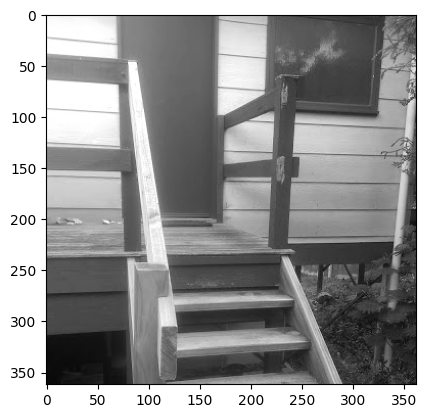

In [ ]:
#our test case: stairs
filename = os.path.join( 'stairs.png')
img = io.imread(filename)
plt.imshow(img, cmap = 'gray')

### Using in-built functions

Shape and type info for input image and edge images: (362, 362) uint8 float64 float64
Sobel Edge  : Min and Max values:  0.0 0.45114234091327077
Prewitt Edge: Min and Max values:  0.0 0.43796312214169625
Absolute sum of pixel difference between edge images: 236.4650336370023


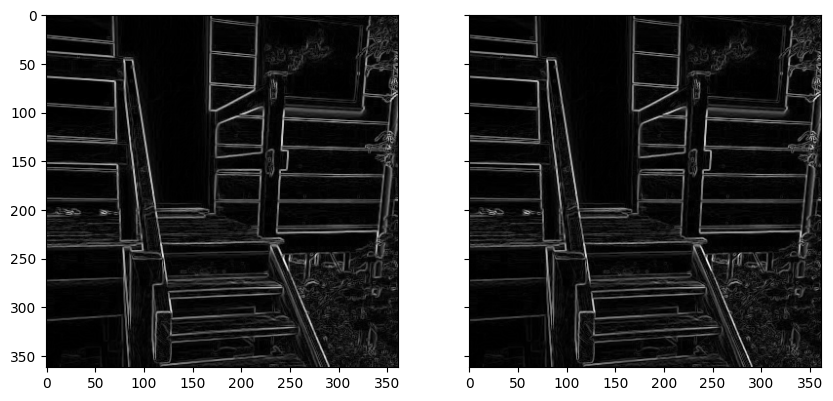

In [ ]:
edge_p = prewitt(img)
edge_s = sobel(img)
print("Shape and type info for input image and edge images:", img.shape, img.dtype, edge_p.dtype, edge_s.dtype)
print("Sobel Edge  : Min and Max values: ", edge_s.min(), edge_s.max())
print("Prewitt Edge: Min and Max values: ", edge_p.min(), edge_p.max())
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(edge_p, cmap = 'gray')
ax[1].imshow(edge_s, cmap = 'gray')
print("Absolute sum of pixel difference between edge images:", sum(sum(abs(edge_p - edge_s))))

### Creating and applying Sobel filters "manually"
This involves applying two filters: filter in `x` direction (responds to vertical lines), and filter in `y` direction (responds to horizontal lines).

**Gradient**: The response to the filter in `x` direction is also called as the gradient in `x` (mathematically, partial derivative with respect to `x`), and the response to the filter in `y` direction is also called as the gradient in `y` (mathematically, partial derivative with respect to `y`).

**Gradient Magnitude**: The magnitude of gradient is nothing but the square root of the sum of square of each gradient. Whaaaaaat?? This may be makes a bit more sense? ----->

![gradients](gradient.png)


Range of sobelx gradient =  -2.3098039215686272 2.431372549019607
Range of sobely gradient =  -2.117647058823529 1.8352941176470594
Gradient Magnitude Type and Shape:  float64 (362, 362)
Manual sobel range =  0.0 2.552046468321176
In-built sobel range =  0.0 0.45114234091327077


Text(0.5, 1.0, 'Sobel Magnitude (in-built)')

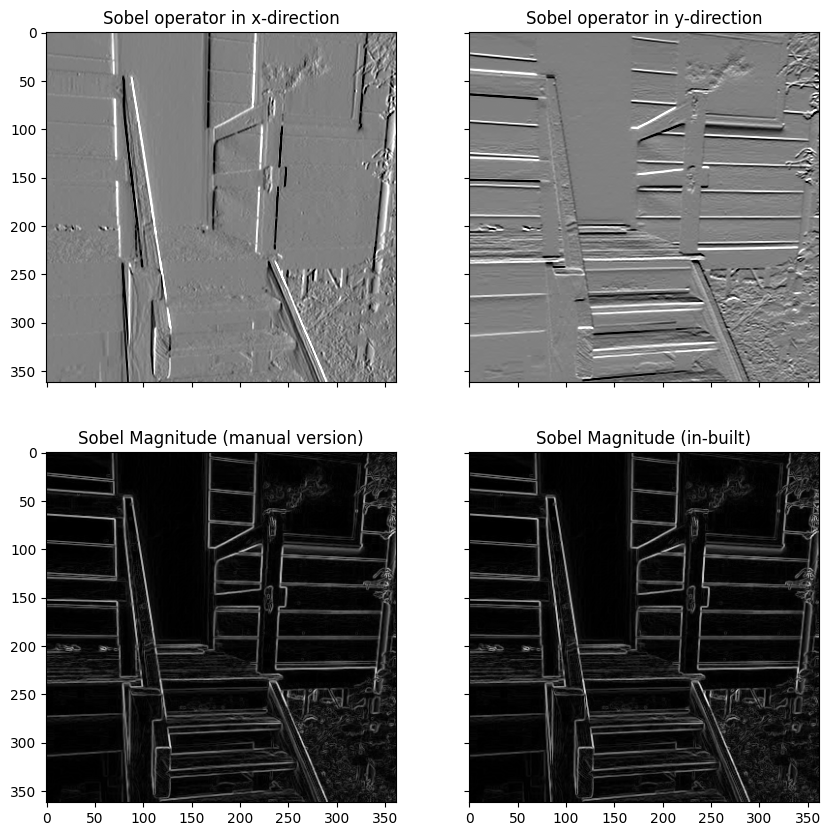

In [ ]:
#Apply sobel filters manually
sobelx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) #finds vertical edges

#sobely is that transpose of the matrix sobelx
sobely = np.transpose(sobelx) #finds horizontal edges

#Convolve image with each filter. Make sure to convert to float (otherwise, uint8 issues!)
sx = ndi.convolve(img_as_float(img),sobelx)
sy = ndi.convolve(img_as_float(img),sobely)

print("Range of sobelx gradient = ", sx.min(), sx.max())
print("Range of sobely gradient = ", sy.min(), sy.max())

mag = sx**2 + sy**2
print("Gradient Magnitude Type and Shape: ", mag.dtype, mag.shape)
edge_sobel = np.sqrt(sx**2 + sy**2)
print("Manual sobel range = ", edge_sobel.min(), edge_sobel.max())
print("In-built sobel range = ", edge_s.min(), edge_s.max())

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex = True, sharey = True)
ax = ax.ravel()
ax[0].imshow(sx, cmap = 'gray', vmin = -1, vmax = 1)
ax[0].set_title("Sobel operator in x-direction")
ax[1].imshow(sy, cmap = 'gray', vmin = -1, vmax = 1)
ax[1].set_title("Sobel operator in y-direction")
ax[2].imshow(edge_sobel, cmap = 'gray')
ax[2].set_title("Sobel Magnitude (manual version)")
ax[3].imshow(edge_s, cmap = 'gray')
ax[3].set_title("Sobel Magnitude (in-built)")


## Part E (15 points)
One application of high pass filters are to "boost" the original image. That is, enhance the edges or the "sharpness"
of the image.  Such filters are known as `high boost` filters, obtained by:

$$high boost = A*(original) - (low pass)$$

Where `A` is an amplification factor. If `A = 1`, then the high boost filter becomes an ordinary high pass filter. Why? Because a high pass filter response is nothing but removing the low pass reponse from the image. In other words, it is simply the low pass response subtracted from the original image.

To see this better, we can also write the high boost formula above as:

$$\begin{align}
high boost &= A*(original) - (low pass)\\
&= A*(original) - (original - (high pass))\\
&=(A-1)*(original) + (high pass)
\end{align}$$

When `A=1`, we are left with the high pass response.

In this part, you will implement a `high boost` filter.



In [ ]:
def highBoost(original, A, sigma = 2):
    '''
    Generates and returns the high boost filter response using the formula
    high boost = A*(original) - (low pass)
    The low pass filter response is generated by applying the Gaussian filter with sigma.
    '''
    #work in the float dtype
    assert(original.dtype == 'float64')
    # YOUR CODE HERE
    low_pass = skimage.filters.gaussian(original,sigma)
    high_boost = A*(original) - (low_pass)

    return high_boost


-0.3132054374190089 0.27392530494432554 0.03112314831090182
Success!


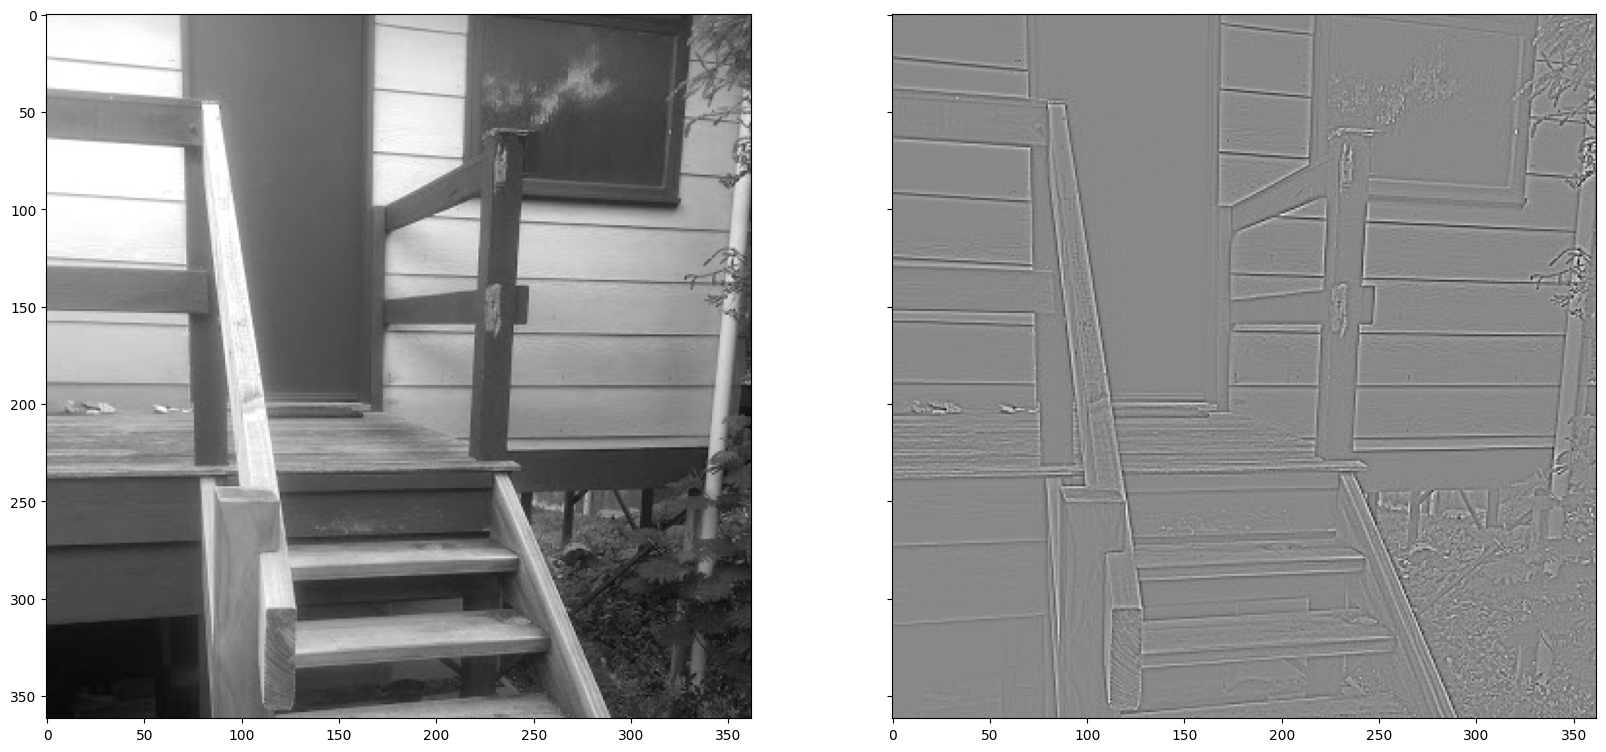

In [ ]:
ampFactor = 1
sigma = 1
#our test case: stairs
filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max(), highb.std())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray')

assert(math.isclose(highb.std(), 0.0311231483))
print("Success!")


-0.2208061446820285 1.2565893332972635
Success!


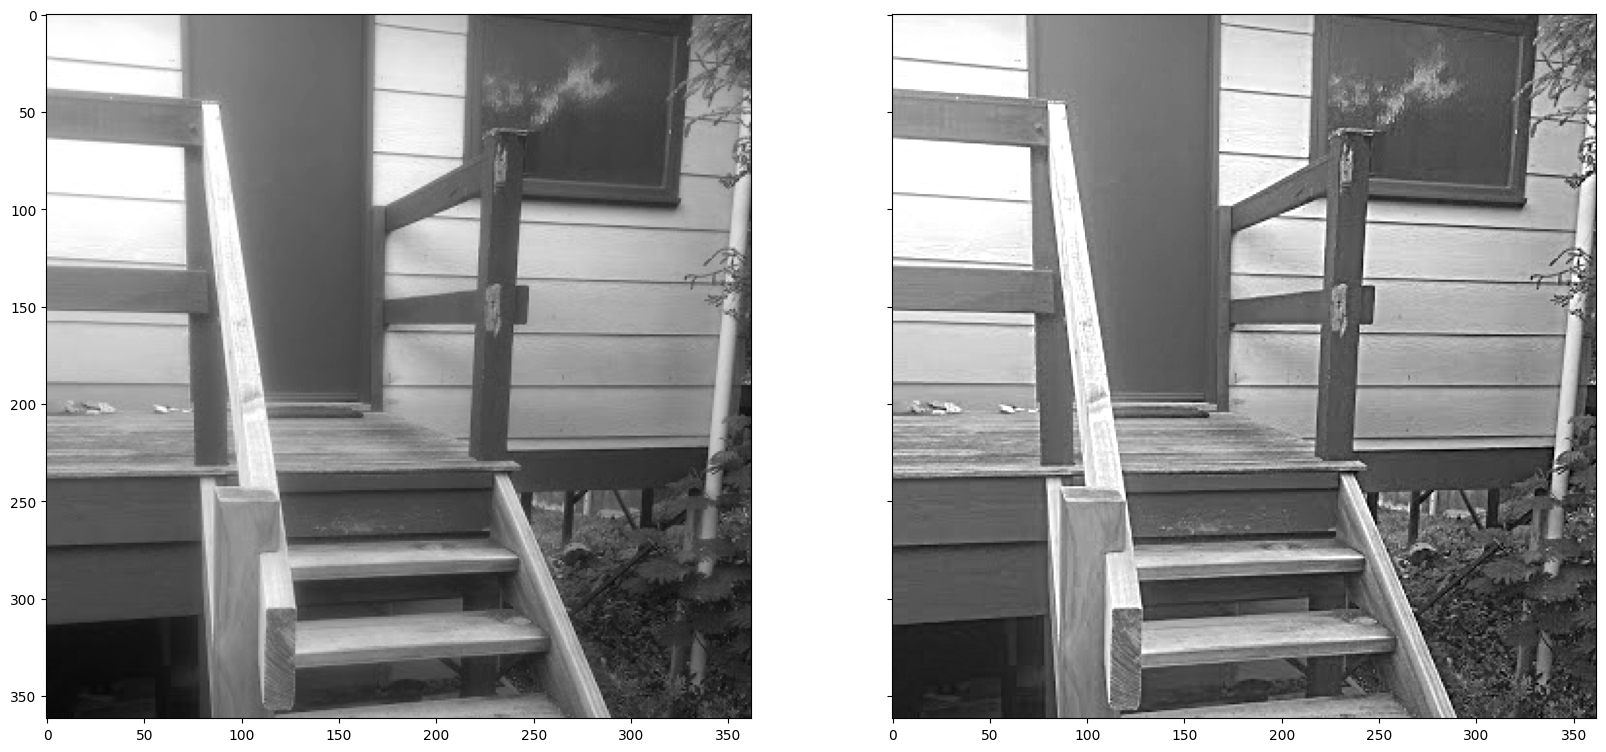

In [ ]:
ampFactor = 2
sigma = 2
#our test case: stairs
filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray', vmin=0, vmax=1)

assert(math.isclose(highb.std(), 0.2458785097))
print("Success!")


-0.22847704481194664 1.6653543678383977
Success!


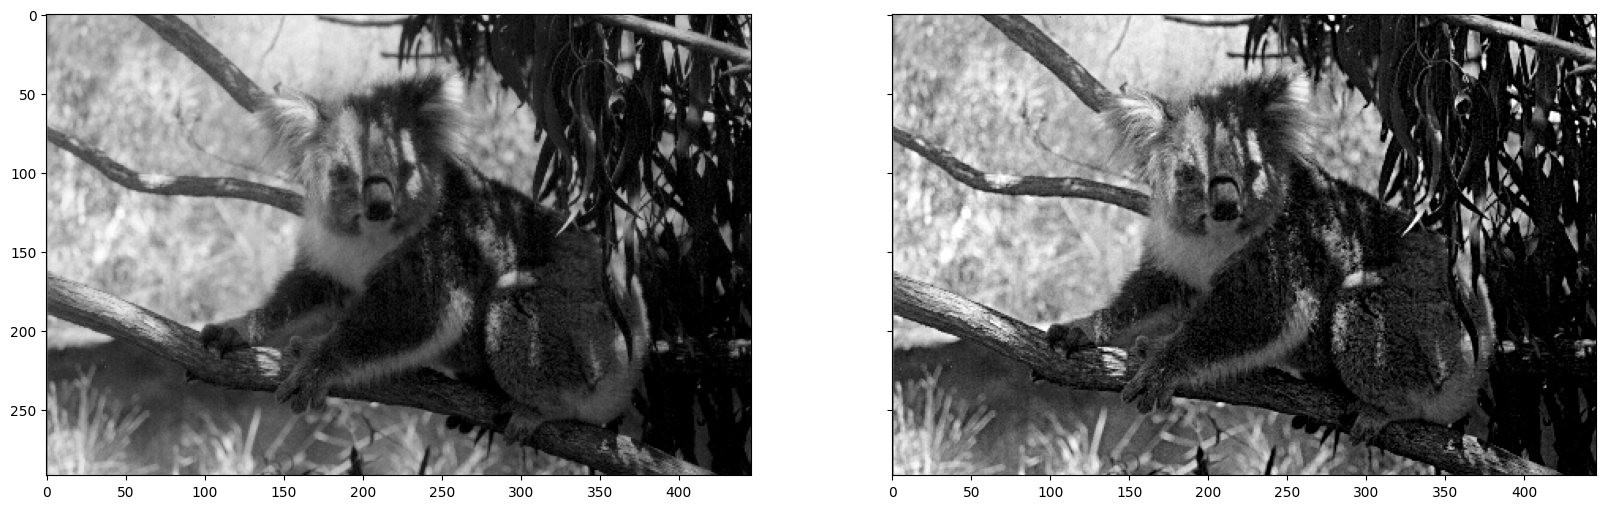

In [ ]:
ampFactor = 2.5
sigma = 2
#our test case: Koala
filename = 'koala.png'
img = img_as_float(io.imread(filename))
highb = highBoost(img, ampFactor, sigma)
print(highb.min(), highb.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()
ax[0].imshow(img, cmap = 'gray')
ax[1].imshow(highb, cmap = 'gray', vmin=0, vmax=1.4)

assert(math.isclose(highb.std(), 0.411406411))
print("Success!")


### Creating and applying Laplacian filter "manually"

Similar to Sobel filter, a Laplacian filter can be used to find edges. Laplacian is a second-order difference operator. We have seen a 1D version of a second-order diference operator earlier: `[1, -2, 1]`. Applying these in both directions gives us one of the [2D versions](https://theailearner.com/2019/05/25/laplacian-of-gaussian-log/):

$$\begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\  0 & 1 & 0 \end{bmatrix}$$


Unlike the Sobel, it uses a single mask to respond to edges. It is "isotropic", meaning the response is same in all directions.

In-built laplace float64 0.0 1.396078431372549
Manually laplace float64 0.0 1.396078431372549


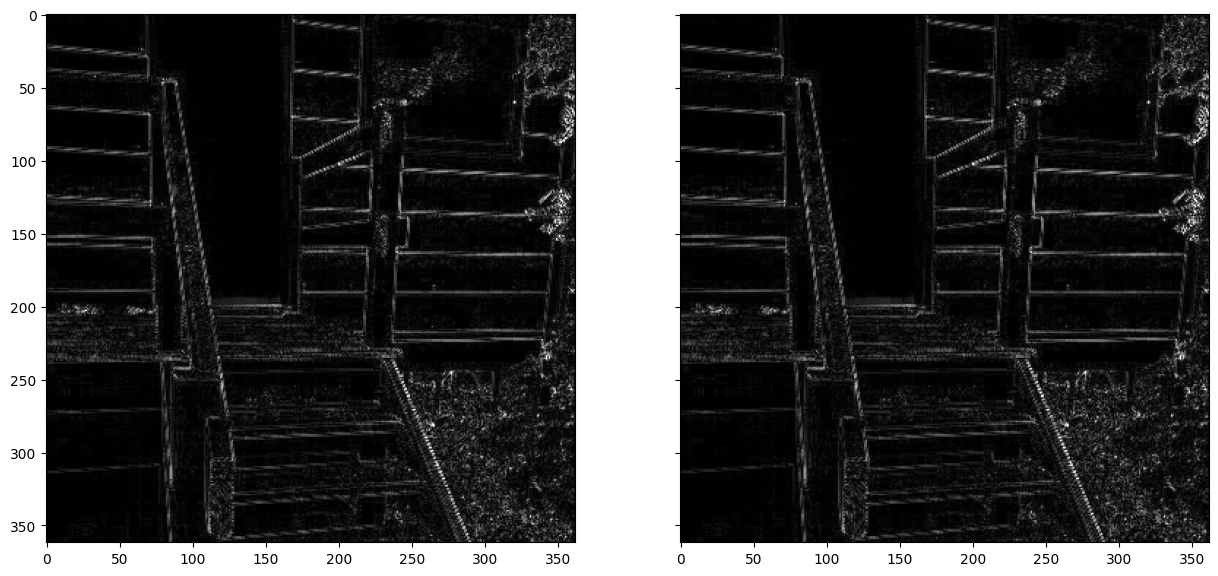

In [ ]:
from skimage.filters import laplace

#Load the stairs image again

filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename)) #Convert to float

#Applying the Laplacian filter using (in-built) laplace function
img_lap1 = abs(laplace(img)) #take the absolute of the second derivative
print("In-built laplace", img_lap1.dtype, img_lap1.min(), img_lap1.max())

#Apply the Laplacian filter manually
#f = np.array([[-2,1,-2],[1,4,1],[-2,1,-2]])
#f = np.array([[1,-2,1],[-2,4,-2],[1,-2,1]])
f = np.array([[0,1,0],[1,-4,1],[0,1,0]])
img_lap2 = abs(ndi.convolve(img,f))
print("Manually laplace", img_lap2.dtype, img_lap2.min(), img_lap2.max())

ig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True)
ax = ax.ravel()
ax[0].imshow(img_lap1, cmap = 'gray', vmin = 0, vmax = 1) #Specify min, max to better see the edges
ax[1].imshow(img_lap2, cmap = 'gray', vmin = 0, vmax = 1)  #Specify min, max to better see the edges

### Creating and applying Laplacian of Gaussian (LoG) filters "manually"

Laplacian filter is sensitive to noise (it will create several "faux" edges). To reduce this noise effect, the image is first smoothed with a Gaussian filter and then the Laplacian is applied. The combined filter is often called Laplacian-of-Gaussian or LoG. You can read [more on LoG here.](https://automaticaddison.com/how-the-laplacian-of-gaussian-filter-works/)

In [ ]:
?ndi.gaussian_laplace

Recall [Part D](#Part-D), where the response of second-order difference operator was seen on a ramp edge. Did you observe how there are two responses (one positive and one negative) on each end of the edge? This suggests that to find the *location* of the edges, one might look at pixels where the edge response crosses zero (better known as "zero-crossings").

To observe these responses more carefully, we can take the absolute value of the edge response. Below is the response of LoG with and without taking the absolute. The zero-crossings are computed in the next cell.

In-built laplace-of-gaussian float64 -0.046424572570155635 0.04789083856276331


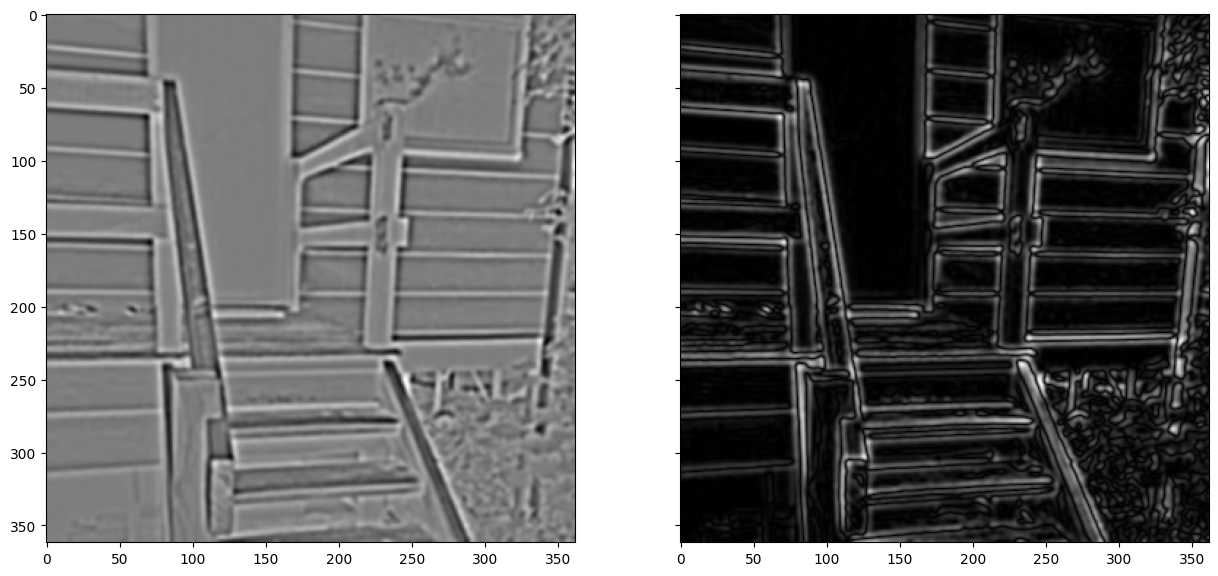

In [ ]:
#Applying the in-built Laplacian of Gaussian filter (LoG)
filename = 'stairs.png'#'koala.png'
img = img_as_float(io.imread(filename)) #Convert to float
sigma = 2

img_lap3 = ndi.gaussian_laplace(img, sigma) #second argument is sigma
print("In-built laplace-of-gaussian", img_lap3.dtype, img_lap3.min(), img_lap3.max())

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
ax = ax.ravel()

ax[0].imshow(img_lap3, cmap = 'gray')
ax[1].imshow(abs(img_lap3), cmap = 'gray')

Using this [code](https://codereview.stackexchange.com/questions/45458/finding-a-zero-crossing-in-a-matrix) from stackoverflow, we can find zero-crossings in the image above - that shows the position of the edge!

In [ ]:
# Find the zero crossing in the l_o_g image
# Done in the most naive way possible
def z_c_test(l_o_g_image):
    #print(l_o_g_image)
    z_c_image = np.zeros(l_o_g_image.shape)
    for i in range(1, l_o_g_image.shape[0] - 1):
        for j in range(1, l_o_g_image.shape[1] - 1):
            neg_count = 0
            pos_count = 0
            for a in np.arange(-1, 2):
                for b in np.arange(-1, 2):
                    if a != 0 and b != 0:
                        #print("a ", a, " b ", b)
                        if l_o_g_image[i + a, j + b] < 0:
                            neg_count += 1
                            #print("neg")
                        elif l_o_g_image[i + a, j + b] > 0:
                            pos_count += 1
                            #print("pos")
                        #else:
                        #    print("zero")

            # If all the signs around the pixel are the same
            # and they're not all zero
            # then it's not a zero crossing and an edge.
            # Otherwise, copy it to the edge map.
            z_c = ((neg_count > 0) and (pos_count > 0))

            if z_c:
                #print("True for", i, ",", j)
                #print("pos ", pos_count, " neg ", neg_count)
                z_c_image[i, j] = 1

    return z_c_image

In [ ]:
def displayZeroCrossing(img):
    zcrimg = z_c_test(img) #find zero crossings

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharex = True, sharey = True) #figsize controls relative size of images
    ax = ax.ravel()

    ax[0].imshow(img, cmap = 'gray')
    ax[1].imshow(zcrimg, cmap = 'gray')

    return zcrimg

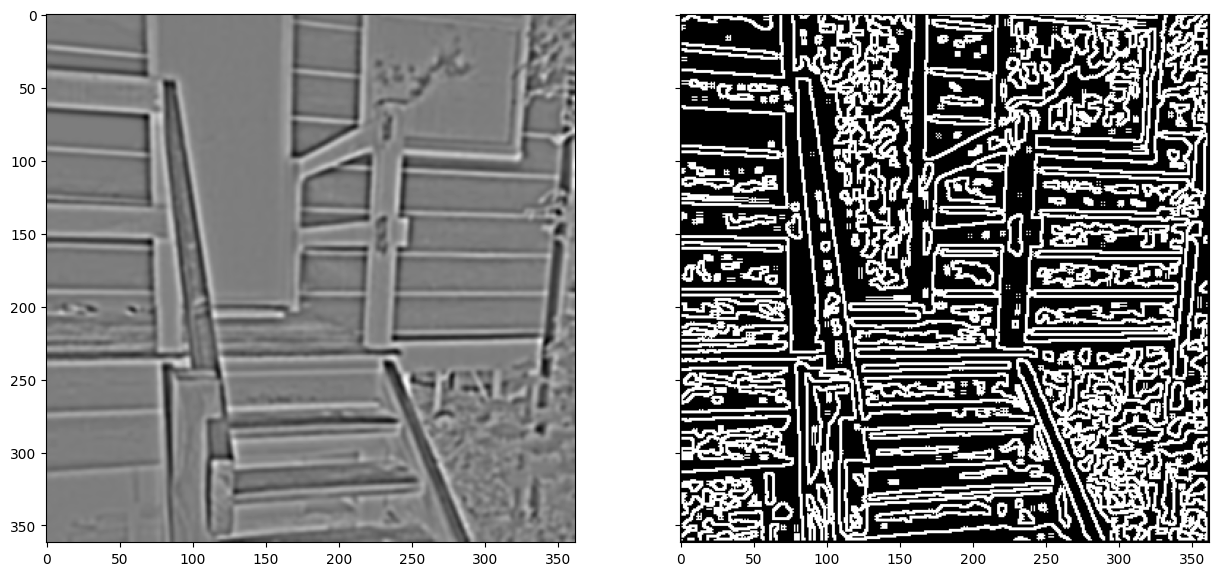

In [ ]:
zcr = displayZeroCrossing(img_lap3)

That's way too many zero crossings! Let us suppress low responses in the edge image.

## Part F (10 points)
Write a function that takes as input LoG response, suppresses low responses (based on Otsu Threshold) and returns the resulting image

In [ ]:
def suppressLowResponse(edgeMagImage):
    '''
    Suppresses low responses in the edgeMagImage using the following algorithm:
       1. Computes the absolute of the edgeMagImage (absImg)
       2. Determines a threshold from absImg automatically using the Otsu method
       3. Creates a mask that finds low responses,
           which are defined to be any response that is less than *half of the threshold*
       4. Uses the mask to assign low responses in edgeMagImage to 0 (boolean indexing!)
       5. Returns the threshold (from step 2) and the modified edgeMagImage (from step 4) in a tuple
    '''
    # YOUR CODE HERE
    absImg = abs(edgeMagImage)
    thresh = skimage.filters.threshold_otsu(absImg)
    mask = absImg < thresh/2
    edgeMagImage[mask] = 0

    return thresh, edgeMagImage


Let us test the function with the edge magnitude image `img_lap3` (obtained for the stairs image above). Your output should look like this (after executing the code in the cell below):

![Output Zero Crossing for the code below](zeroCrossing.png)


Threshold = 0.009260151745586686
Mean of Zero Crossings = 0.0949681023167791


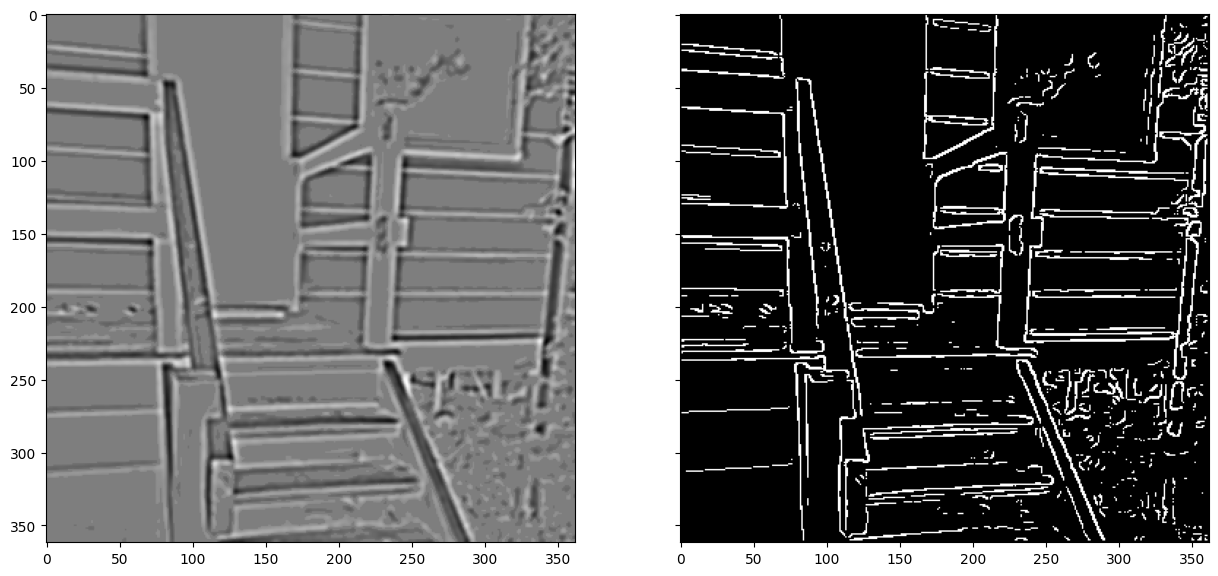

In [ ]:
#Let us test the function with the edge magnitude image obtained in the cell above (for stairs)
thresh, suppImg = suppressLowResponse(img_lap3)
print("Threshold =", thresh) #should print 0.009260151745586686 in this case
zcr = displayZeroCrossing(suppImg)
print("Mean of Zero Crossings =", zcr.mean()) #should print 0.0949681023167791 in this case

Threshold = 0.004888640234835056
Mean of Zero Crossings = 0.038216171667531516
Success!


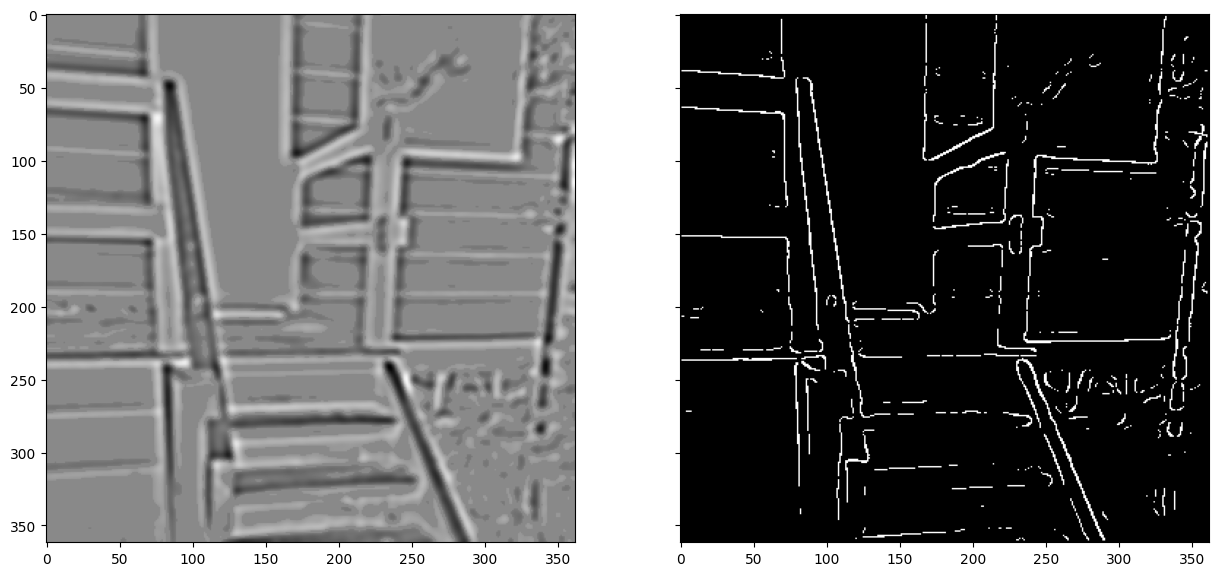

In [ ]:
img = img_as_float(io.imread('stairs.png')) #load stairs image
img_lap = ndi.gaussian_laplace(img, 3) #Find LoG response using sigma=3

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh)
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.00488864023))
assert(math.isclose(zcr.mean(), 0.038216171667))
print("Success!")

Threshold = 0.015760585137774785
Mean of Zero Crossings = 0.03981781005859375
Success!


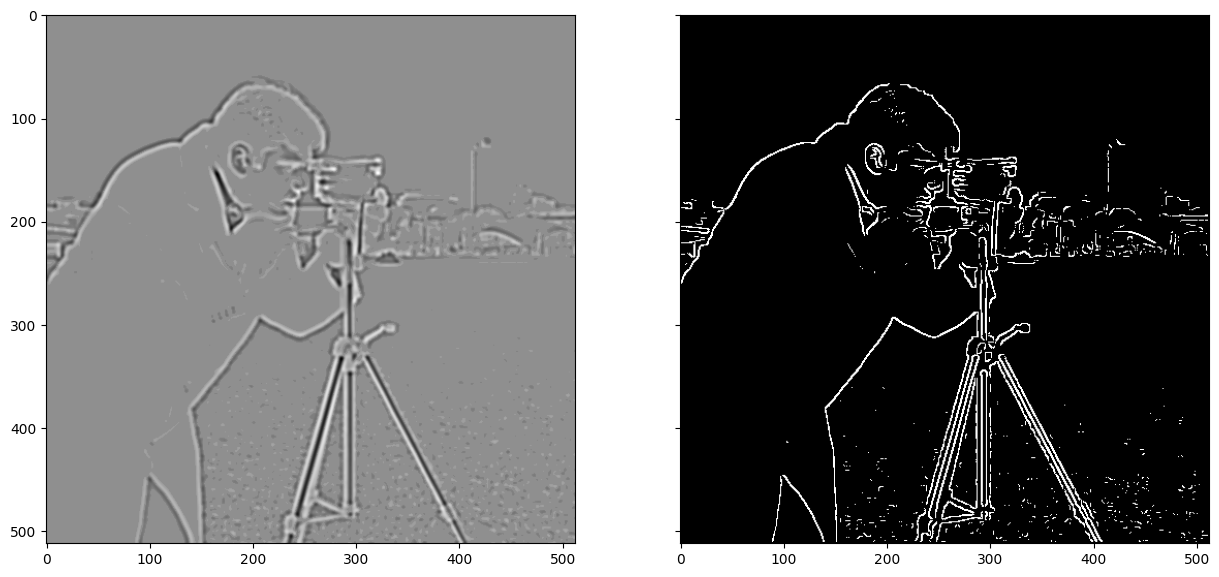

In [ ]:
img = img_as_float(data.camera())
img_lap = ndi.gaussian_laplace(img, 2) #Find LoG response using sigma=2

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh)
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.01576058514))
assert(math.isclose(zcr.mean(), 0.03981781005))
print("Success!")

## Part G (10 points)
Create the LoG filter manually, apply it on input image, and find the zero-crossings in the image

In [ ]:
def my_LoG(img, sigma):
    '''
    Replaces the functionality of ndi.gaussian_laplace by:
       1. Blurring the image with a Gaussian filter truncated to 2 standard deviations
       2. Convolving the resulting image with the 3x3 laplacian filter (provided previously)

    Returns the resulting LoG image
    '''
    assert(img.dtype == 'float64')

    # YOUR CODE HERE
    blurredImg = ndi.gaussian_filter(img,sigma,truncate=2)
    lap_filter = np.array([[0,1,0],[1,-4,1],[0,1,0]])
    LoG_img = ndi.convolve(blurredImg,lap_filter)

    return LoG_img


Threshold = 0.009242258689481128
Mean of Zero Crossings = 0.09264063978511035
Success!


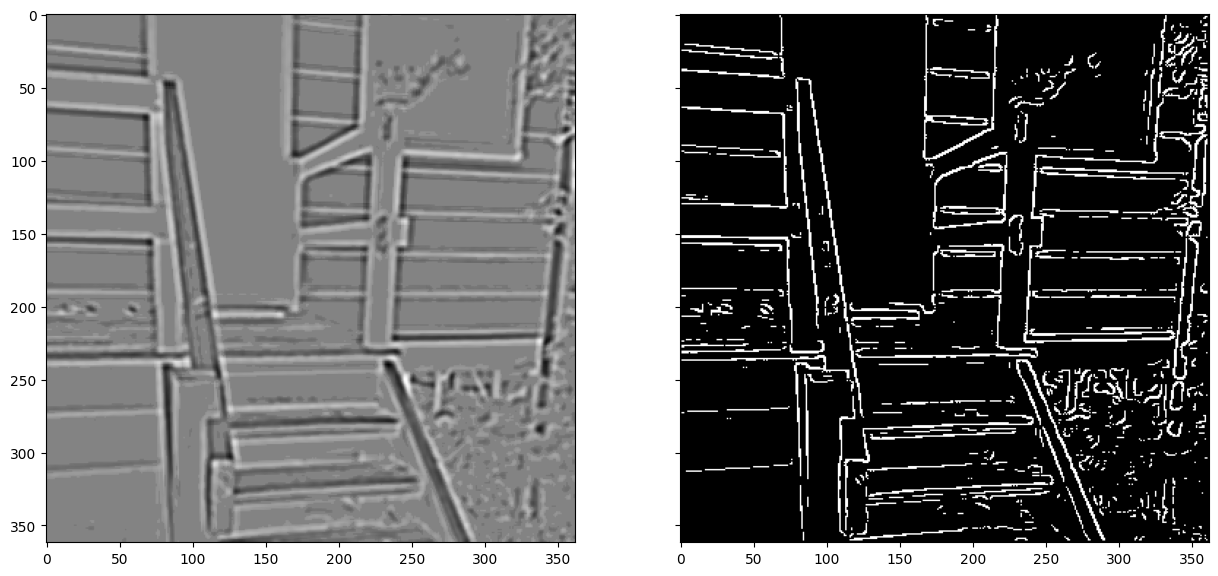

In [ ]:
img = img_as_float(io.imread('stairs.png')) #load stairs image
img_lap = my_LoG(img, 2) #Find LoG response using sigma=2

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh)
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.009242258689))
assert(math.isclose(zcr.mean(), 0.09264063978))
print("Success!")

Threshold = 0.008660730910209854
Mean of Zero Crossings = 0.07703348459845985
Success!


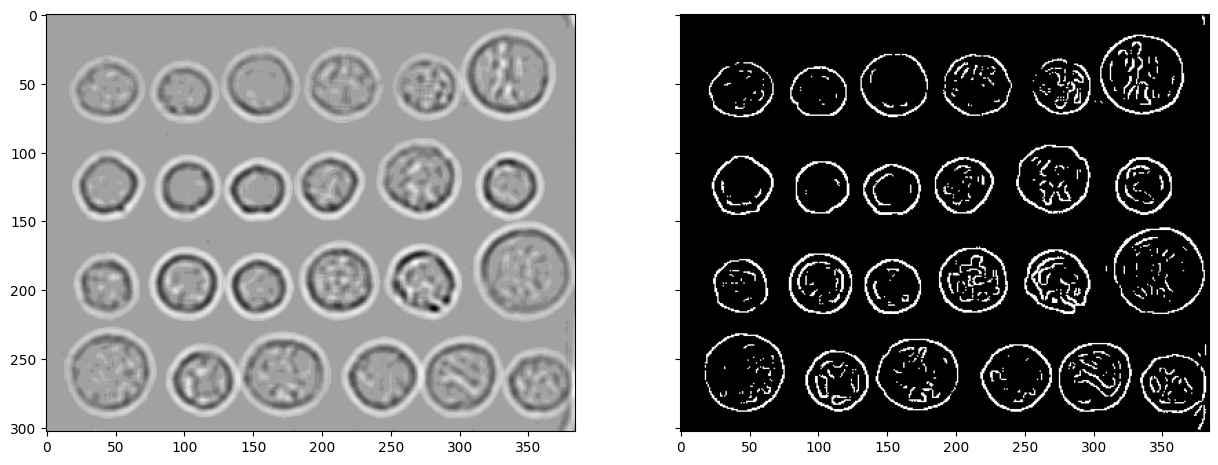

In [ ]:
img = img_as_float(data.coins()) #load coins image
img_lap = my_LoG(img, 2.5) #Find LoG response using sigma=2.5

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh)
print("Mean of Zero Crossings =", zcr.mean())

assert(math.isclose(thresh, 0.0086607309102))
assert(math.isclose(zcr.mean(), 0.07703348459))
print("Success!")

Threshold = 0.010420178882088486
Mean of Zero Crossings = 0.1589202880859375


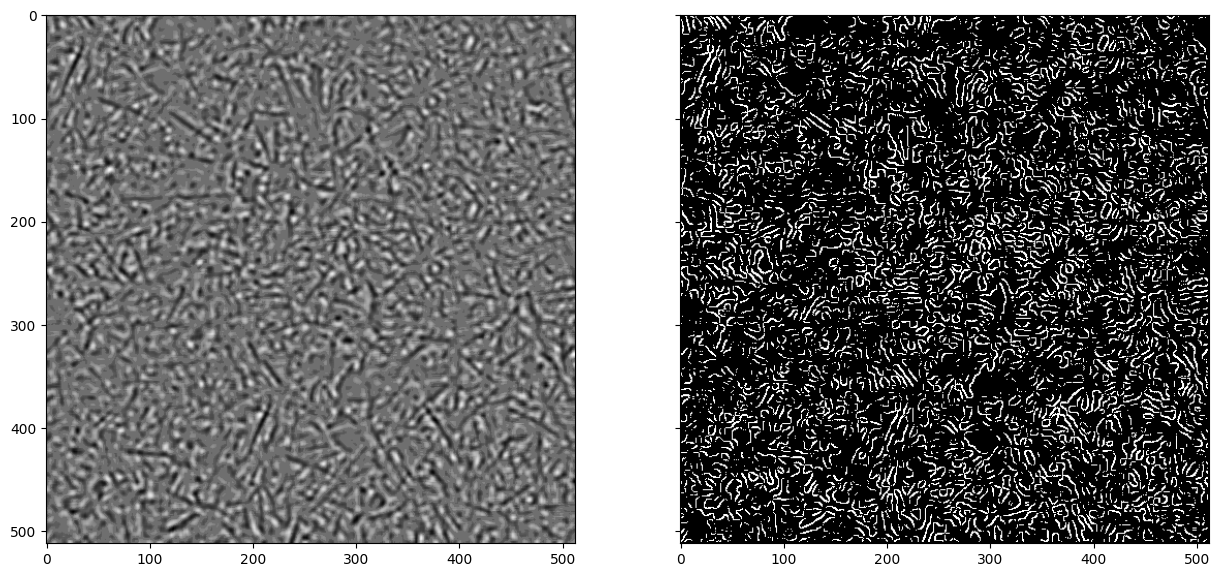

In [ ]:
img = img_as_float(data.grass()) #load coins image
img_lap = my_LoG(img, 2.5) #Find LoG response using sigma=2.5

thresh, suppImg = suppressLowResponse(img_lap)
zcr = displayZeroCrossing(suppImg)
print("Threshold =", thresh)
print("Mean of Zero Crossings =", zcr.mean())

Make sure to test your code on additional test images